In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.models import load_model
from tensorflow import keras
from sklearn.utils import class_weight
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score, recall_score, f1_score


In [2]:
df = pd.read_csv('dataset/spotify_tracks.csv')

df.head()

,id,name,genre,artists,album,popularity,duration_ms,explicit
0,7kr3xZk4yb3YSZ4VFtg2Qt,Acoustic,acoustic,Billy Raffoul,1975,58,172199,False
1,1kJygfS4eoVziBBI93MSYp,Acoustic,acoustic,Billy Raffoul,A Few More Hours at YYZ,57,172202,False
2,6lynns69p4zTCRxmmiSY1x,Here Comes the Sun - Acoustic,acoustic,"Molly Hocking, Bailey Rushlow",Here Comes the Sun (Acoustic),42,144786,False
3,1RC9slv335IfLce5vt9KTW,Acoustic #3,acoustic,The Goo Goo Dolls,Dizzy up the Girl,46,116573,False
4,5o9L8xBuILoVjLECSBi7Vo,My Love Mine All Mine - Acoustic Instrumental,acoustic,"Guus Dielissen, Casper Esmann",My Love Mine All Mine (Acoustic Instrumental),33,133922,False


In [3]:
df_selected = df[['name', 'genre', 'artists', 'album', 'popularity', 'explicit']]
df_selected.head()

,name,genre,artists,album,popularity,explicit
0,Acoustic,acoustic,Billy Raffoul,1975,58,False
1,Acoustic,acoustic,Billy Raffoul,A Few More Hours at YYZ,57,False
2,Here Comes the Sun - Acoustic,acoustic,"Molly Hocking, Bailey Rushlow",Here Comes the Sun (Acoustic),42,False
3,Acoustic #3,acoustic,The Goo Goo Dolls,Dizzy up the Girl,46,False
4,My Love Mine All Mine - Acoustic Instrumental,acoustic,"Guus Dielissen, Casper Esmann",My Love Mine All Mine (Acoustic Instrumental),33,False


In [4]:
df_selected.isnull().sum()

name          0
genre         0
artists       0
album         0
popularity    0
explicit      0
dtype: int64

In [5]:
df_selected.dtypes

name          object
genre         object
artists       object
album         object
popularity     int64
explicit        bool
dtype: object

In [7]:
le = LabelEncoder()

encoders = {} 

for col in df_selected.select_dtypes(include=['object']).columns:
    df_selected[col] = le.fit_transform(df_selected[col])
    encoders[col] = le

df_selected.head()

,name,genre,artists,album,popularity,explicit
0,71,0,496,39,58,False
1,71,0,496,91,57,False
2,1707,0,2697,1873,42,False
3,72,0,3880,1128,46,False
4,2534,0,1639,2764,33,False


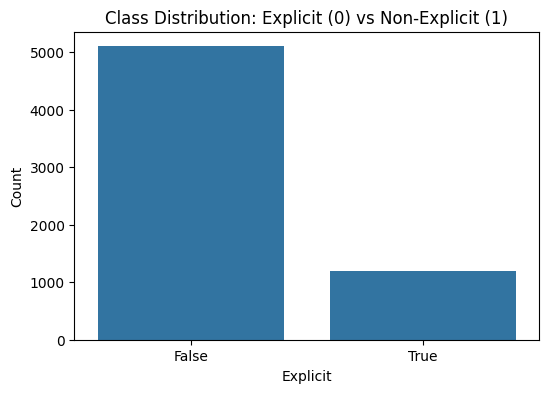

In [8]:
# Class distribution for the target variable (explicit)
plt.figure(figsize=(6, 4))
sns.countplot(x='explicit', data=df_selected, legend=False)
plt.title("Class Distribution: Explicit (0) vs Non-Explicit (1)")
plt.xlabel("Explicit")
plt.ylabel("Count")
plt.show()

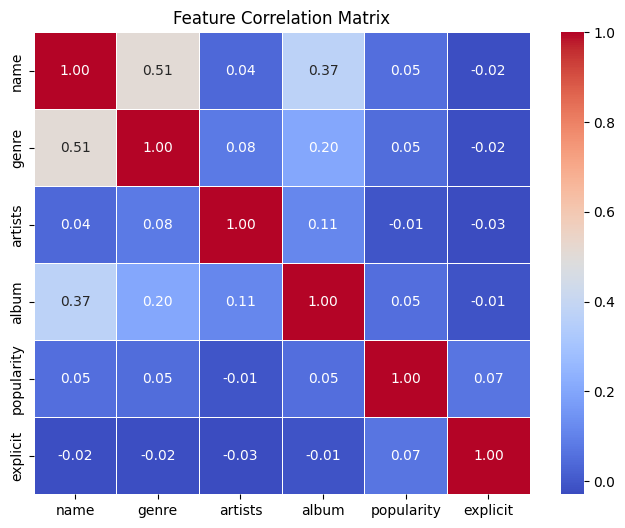

In [9]:
# Feature correlation heatmap
plt.figure(figsize=(8, 6))
corr_matrix = df_selected.corr()  # Compute correlation matrix
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", cbar=True, linewidths=0.5)
plt.title("Feature Correlation Matrix")
plt.show()

In [11]:
# Separate features and target
X = df_selected.drop('explicit', axis=1)
y = df_selected['explicit']

# Split the data (80% train, 20% test) using stratified sampling to preserve class distribution
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Check the shapes of the train and test sets
print(f"Training Set X: {X_train.shape}, Testing Set: {X_test.shape}")
print(f"Training Set Y: {y_train.shape}, Testing Set: {y_test.shape}")

# Check the distribution of the target variable in both sets
print(f"Class distribution in training set: \n{y_train.value_counts()}")
print(f"Class distribution in testing set: \n{y_test.value_counts()}")


Training Set X: (5036, 5), Testing Set: (1260, 5)
Training Set Y: (5036,), Testing Set: (1260,)
Class distribution in training set: 
explicit
False    4076
True      960
Name: count, dtype: int64
Class distribution in testing set: 
explicit
False    1027
True      233
Name: count, dtype: int64


In [101]:
# Initialize models
models = [
    ('Logistic Regression', LogisticRegression(random_state=42, class_weight='balanced')),
    ('KNN', KNeighborsClassifier()),
    ('Decision Tree', DecisionTreeClassifier(random_state=42)),
    ('Naive Bayes', GaussianNB())
]

# Store classification reports
classification_reports = {}

for name, model in models:
    # Train the model
    model.fit(X_train, y_train)
    
    # Predict on test data
    y_pred = model.predict(X_test)
    
    # Store and print classification report
    classification_reports[name] = classification_report(y_test, y_pred, zero_division=1)
    
    print(f"{name} Performance:")
    print(classification_reports[name])
    print("="*50)

# Optionally, print all classification reports again
print("\nAll Models' Classification Reports:")
for name, report in classification_reports.items():
    print(f"\n{name} Classification Report:")
    print(report)

Logistic Regression Performance:
              precision    recall  f1-score   support

       False       0.84      0.57      0.68      1027
        True       0.22      0.52      0.31       233

    accuracy                           0.56      1260
   macro avg       0.53      0.55      0.49      1260
weighted avg       0.72      0.56      0.61      1260

KNN Performance:
              precision    recall  f1-score   support

       False       0.83      0.94      0.88      1027
        True       0.34      0.13      0.19       233

    accuracy                           0.79      1260
   macro avg       0.58      0.54      0.53      1260
weighted avg       0.74      0.79      0.75      1260

Decision Tree Performance:
              precision    recall  f1-score   support

       False       0.85      0.82      0.84      1027
        True       0.32      0.36      0.34       233

    accuracy                           0.74      1260
   macro avg       0.59      0.59      0.59      12

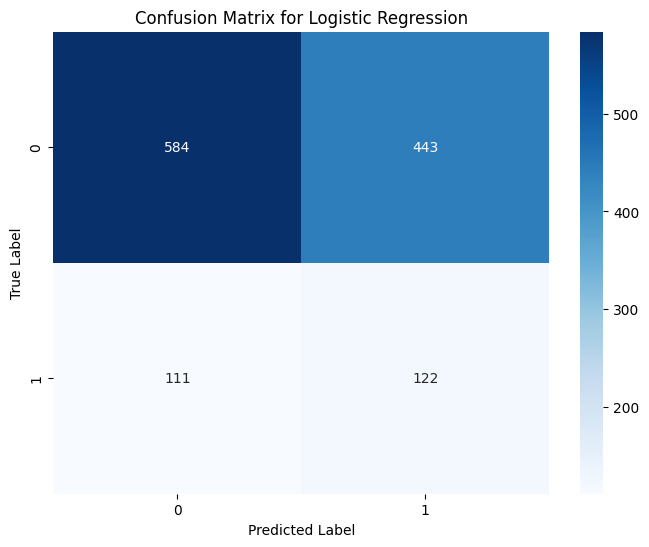

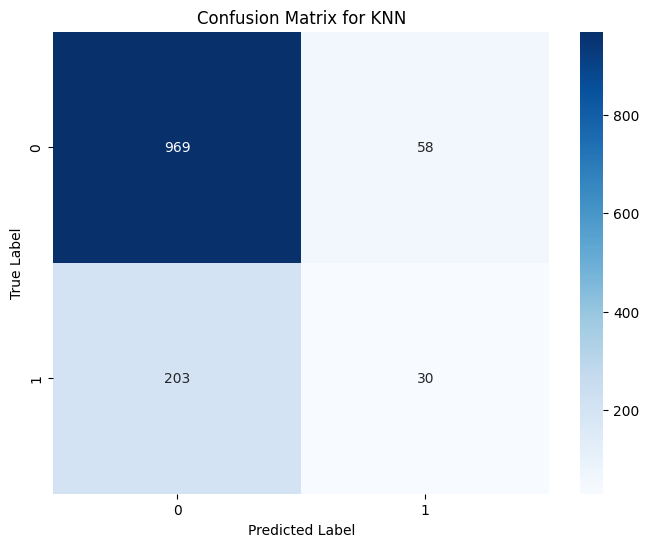

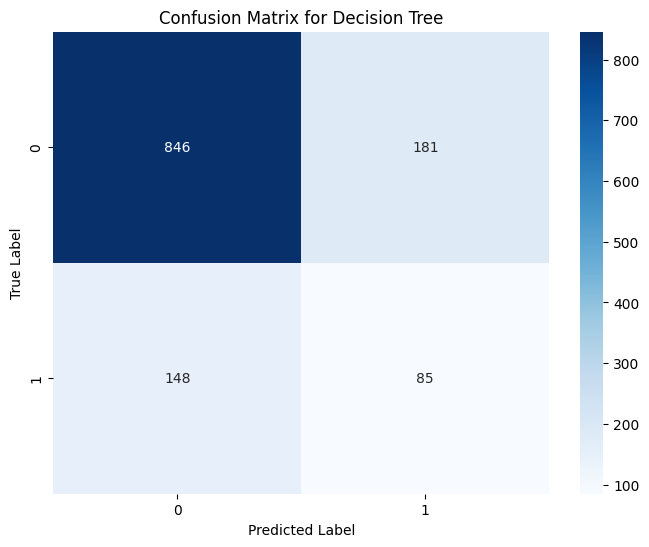

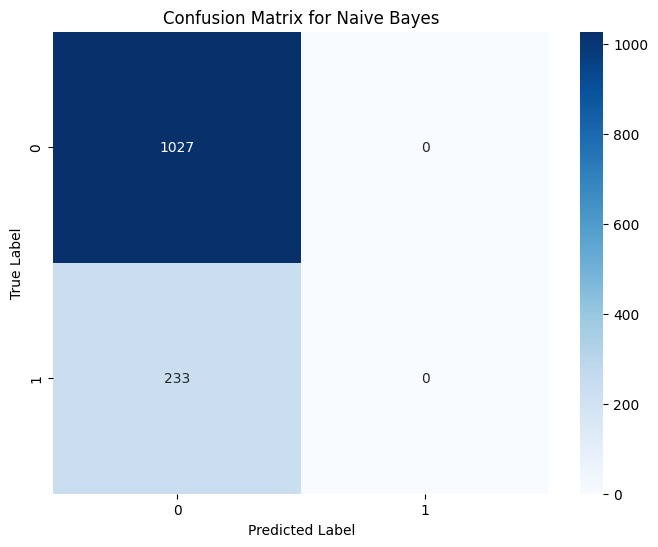

In [103]:
# Loop over each model to plot the confusion matrix
for name, model in models:
    # Make predictions
    y_pred = model.predict(X_test)
    
    # Compute confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    
    # Plot the confusion matrix using seaborn heatmap
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='g', cmap='Blues', xticklabels=[0, 1], yticklabels=[0, 1])
    
    # Add labels and title
    plt.title(f'Confusion Matrix for {name}')
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    
    # Show plot
    plt.show()

In [87]:
# Build the model
def build_model():
    model = keras.Sequential([
        Input(shape=(X_train.shape[1],)),
        Dense(64, activation='relu'),
        Dropout(0.3),
        Dense(32, activation='relu'),
        Dense(1, activation='sigmoid')
    ])
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model

# Build and train the model on the entire training set
model = build_model()
model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test), verbose=1)

# Predict on the test set
y_pred = (model.predict(X_test) > 0.5).astype(int)

# Evaluate the model
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred, zero_division=1)
rec = recall_score(y_test, y_pred, zero_division=1)
f1 = f1_score(y_test, y_pred, zero_division=1)

# Show the metrics
print("\n=== Evaluation on Test Set ===")
print(f"Accuracy : {acc:.4f}")
print(f"Precision: {prec:.4f}")
print(f"Recall   : {rec:.4f}")
print(f"F1 Score : {f1:.4f}")

# Optional: full classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred, zero_division=1))


Epoch 1/10
158/158 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7167 - loss: 92.1876 - val_accuracy: 0.6079 - val_loss: 5.1556
Epoch 2/10
158/158 ━━━━━━━━━━━━━━━━━━━━ 0s 925us/step - accuracy: 0.6933 - loss: 21.8476 - val_accuracy: 0.6325 - val_loss: 3.9117
Epoch 3/10
158/158 ━━━━━━━━━━━━━━━━━━━━ 0s 771us/step - accuracy: 0.6966 - loss: 13.0063 - val_accuracy: 0.8159 - val_loss: 6.5116
Epoch 4/10
158/158 ━━━━━━━━━━━━━━━━━━━━ 0s 772us/step - accuracy: 0.6976 - loss: 8.8549 - val_accuracy: 0.7992 - val_loss: 4.5258
Epoch 5/10
158/158 ━━━━━━━━━━━━━━━━━━━━ 0s 765us/step - accuracy: 0.6886 - loss: 6.3520 - val_accuracy: 0.8016 - val_loss: 1.3340
Epoch 6/10
158/158 ━━━━━━━━━━━━━━━━━━━━ 0s 794us/step - accuracy: 0.6921 - loss: 4.3059 - val_accuracy: 0.8048 - val_loss: 2.2569
Epoch 7/10
158/158 ━━━━━━━━━━━━━━━━━━━━ 0s 889us/step - accuracy: 0.7095 - loss: 2.7859 - val_accuracy: 0.7198 - val_loss: 1.3732
Epoch 8/10
158/158 ━━━━━━━━━━━━━━━━━━━━ 0s 900us/step - accuracy: 0.7020 - loss: 2.0581 -

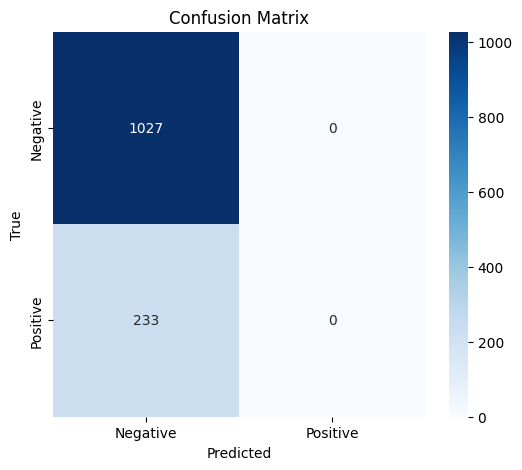

In [99]:
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)

# Plot confusion matrix as a heatmap
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Negative", "Positive"], yticklabels=["Negative", "Positive"])
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

In [88]:
# Save the model as .h5
model.save("my_model.h5")
print("Model saved as 'my_model.h5'")

Model saved as 'my_model.h5'


In [96]:
# Load the saved model
loaded_model = load_model("my_model.h5")

# Example dictionary with the same features as your training data
input_data = {
    'name': ['Italy'],      
    'genre': ['french'],            
    'artists': ['We love barney'],  
    'album': ['Freasdnch'],    
    'popularity': [343]
}

# Convert the dictionary into a DataFrame
input_df = pd.DataFrame(input_data)

# Apply label encoding to categorical features
label_encoder = LabelEncoder()
input_df['name'] = label_encoder.fit_transform(input_df['name'])
input_df['genre'] = label_encoder.fit_transform(input_df['genre'])
input_df['artists'] = label_encoder.fit_transform(input_df['artists'])
input_df['album'] = label_encoder.fit_transform(input_df['album'])

# Ensure numerical column is float
input_df['popularity'] = input_df['popularity'].astype(float)

# Predict using the loaded model (no scaling applied)
y_pred_prob = loaded_model.predict(input_df)

# Get the predicted class based on the threshold (0.5)
y_pred_class = (y_pred_prob > 0.5).astype(int)

# Show the prediction and confidence level
print(f"\nPrediction for the single input data: {y_pred_class[0][0]}")
print(f"Confidence level for the prediction: {y_pred_prob[0][0]:.4f}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step

Prediction for the single input data: 1
Confidence level for the prediction: 1.0000


In [14]:
# Initialize LabelEncoder and StandardScaler
le = LabelEncoder()
scaler = StandardScaler()

# Load the testing dataset
df_test = pd.read_csv('dataset/extracted_tracks.csv')  

# Select the same columns as in the training dataset
df_test_selected = df_test[['name', 'genre', 'artists', 'album', 'popularity']].copy()


# Initialize encoders dictionary to store the label encoders for each column
encoders = {}

# Apply LabelEncoder to categorical columns in the test set
for col in X_test.select_dtypes(include=['object']).columns:
    # Use the encoder that was fitted on the training data (not fitting a new encoder)
    if col in encoders:
        X_test[col] = encoders[col].transform(X_test[col])
    else:
        # If the encoder is not already saved, we fit it and save it
        le.fit(X_test[col])
        X_test[col] = le.transform(X_test[col])
        encoders[col] = le

# Convert the numerical columns to float before scaling
numerical_columns = ['popularity']

# Ensure the column is of type float64 before applying StandardScaler
X_test[numerical_columns] = X_test[numerical_columns].astype('float64')

# Apply StandardScaler to numerical columns (e.g., 'popularity')
X_test[numerical_columns] = scaler.fit_transform(X_test[numerical_columns])

# Now you can use X_test for predictions using the trained model
# Use the trained logistic regression model for prediction
pred = lr_model.predict(X_test)
prob = lr_model.predict_proba(X_test)

# Output predictions and confidence
for i, row in df_test_selected.iterrows():
    print(f"Track: {row['name']}")
    print(f"Prediction: {'Explicit' if pred[i] == 1 else 'Not Explicit'}")
    print(f"Confidence: {prob[i][pred[i]]:.2f}")
    print('---')

# If you want to evaluate the model's performance on the test set:
print("Logistic Regression Performance on Test Data:")
print(classification_report(y_test, pred, zero_division=1))


Track: French
Prediction: Not Explicit
Confidence: 1.00
---
Track: Bluegrass Is... (Reprise)
Prediction: Not Explicit
Confidence: 1.00
---
Track: Summer in Marseille
Prediction: Not Explicit
Confidence: 1.00
---
Track: Inertia - Acoustic
Prediction: Not Explicit
Confidence: 1.00
---
Logistic Regression Performance on Test Data:
              precision    recall  f1-score   support

           0       0.81      1.00      0.90      1021
           1       1.00      0.00      0.00       239

    accuracy                           0.81      1260
   macro avg       0.91      0.50      0.45      1260
weighted avg       0.85      0.81      0.73      1260



c:\Python312\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(
c:\Python312\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


In [69]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

# Initialize LabelEncoder and StandardScaler
le = LabelEncoder()
scaler = StandardScaler()

# Manually input your data as a dictionary
# Example data for testing
input_data = {
    'name': ['Track1', 'Track2', 'Track3'],  # Track names
    'genre': ['Pop', 'Rock', 'Jazz'],        # Genres
    'artists': ['Artist1', 'Artist2', 'Artist3'],  # Artists
    'album': ['Album1', 'Album2', 'Album3'],  # Albums
    'popularity': [85, 55, 78],               
                   
}

# Convert input data to DataFrame
df_test_selected = pd.DataFrame(input_data)

# Initialize encoders dictionary to store the label encoders for each column
encoders = {}

# Apply LabelEncoder to categorical columns in the input data
for col in df_test_selected.select_dtypes(include=['object']).columns:
    # Use the encoder that was fitted on the training data (not fitting a new encoder)
    if col in encoders:
        df_test_selected[col] = encoders[col].transform(df_test_selected[col])
    else:
        # If the encoder is not already saved, we fit it and save it
        le.fit(df_test_selected[col])
        df_test_selected[col] = le.transform(df_test_selected[col])
        encoders[col] = le

# Convert the numerical columns to float before scaling
numerical_columns = ['popularity']

# Ensure the column is of type float64 before applying StandardScaler
df_test_selected[numerical_columns] = df_test_selected[numerical_columns].astype('float64')

# Apply StandardScaler to numerical columns (e.g., 'popularity')
df_test_selected[numerical_columns] = scaler.fit_transform(df_test_selected[numerical_columns])


pred = model.predict(X_test)
prob = model.predict_proba(X_test)

# Output predictions and confidence
for i, row in df_test_selected.iterrows():
    print(f"Track: {row['name']}")
    print(f"Prediction: {'Explicit' if pred[i] == 1 else 'Not Explicit'}")
    print(f"Confidence: {prob[i][pred[i]]:.2f}")
    print('---')



40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 415us/step


AttributeError: 'Sequential' object has no attribute 'predict_proba'

In [ ]:
import tkinter as tk
from tkinter import messagebox
import pandas as pd
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression



# Initialize LabelEncoder and StandardScaler (use the same ones you used for training)
le = LabelEncoder()
scaler = StandardScaler()

# Initialize Tkinter window
root = tk.Tk()
root.title("Track Explicit Content Prediction")

# Function to handle user input and display prediction
def predict_track():
    try:
        # Get input from the user
        track_name = entry_name.get()
        genre = entry_genre.get()
        artist = entry_artist.get()
        album = entry_album.get()
        popularity = float(entry_popularity.get())

        # Prepare the input data as DataFrame
        input_data = {
            'name': [track_name],
            'genre': [genre],
            'artists': [artist],
            'album': [album],
            'popularity': [popularity],
        }

        df_input = pd.DataFrame(input_data)

        # Apply LabelEncoder to categorical columns
        df_input['genre'] = le.fit_transform(df_input['genre'])
        df_input['artists'] = le.fit_transform(df_input['artists'])
        df_input['album'] = le.fit_transform(df_input['album'])

        # Convert the numerical columns to float before scaling
        numerical_columns = ['popularity']

        # Ensure the column is of type float64 before applying StandardScaler
        df_test_selected[numerical_columns] = df_test_selected[numerical_columns].astype('float64')

        # Apply StandardScaler to numerical columns (e.g., 'popularity')
        df_test_selected[numerical_columns] = scaler.fit_transform(df_test_selected[numerical_columns])

        # Use the trained model to make a prediction
        pred = lr_model.predict(df_input)
        prob = lr_model.predict_proba(df_input)

        # Display the prediction result
        prediction = "Explicit" if pred[0] == 1 else "Not Explicit"
        confidence = f"{prob[0][pred[0]]:.2f}"

        # Display the result in the UI
        result_label.config(text=f"Prediction: {prediction}\nConfidence: {confidence}")

    except Exception as e:
        messagebox.showerror("Error", f"An error occurred: {e}")

# Create UI components for input
label_name = tk.Label(root, text="Track Name:")
label_name.grid(row=0, column=0)
entry_name = tk.Entry(root)
entry_name.grid(row=0, column=1)

label_genre = tk.Label(root, text="Genre:")
label_genre.grid(row=1, column=0)
entry_genre = tk.Entry(root)
entry_genre.grid(row=1, column=1)

label_artist = tk.Label(root, text="Artist:")
label_artist.grid(row=2, column=0)
entry_artist = tk.Entry(root)
entry_artist.grid(row=2, column=1)

label_album = tk.Label(root, text="Album:")
label_album.grid(row=3, column=0)
entry_album = tk.Entry(root)
entry_album.grid(row=3, column=1)

label_popularity = tk.Label(root, text="Popularity:")
label_popularity.grid(row=4, column=0)
entry_popularity = tk.Entry(root)
entry_popularity.grid(row=4, column=1)

# Button to trigger prediction
predict_button = tk.Button(root, text="Predict", command=predict_track)
predict_button.grid(row=5, columnspan=2)

# Label to display the prediction result
result_label = tk.Label(root, text="Prediction will appear here")
result_label.grid(row=6, columnspan=2)

# Start the Tkinter event loop
root.mainloop()
